In [26]:
# importing required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [27]:
import warnings
warnings.filterwarnings("ignore")

In [28]:
# Loading the dataframe
data = pd.read_csv("Superstore.csv",encoding='latin-1')

In [29]:
# Displaying random records in a dataframe.
data.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
459,460,CA-2015-109638,12/15/2015,12/22/2015,Standard Class,JH-15985,Joseph Holt,Consumer,United States,Seattle,...,98115,West,OFF-AP-10002472,Office Supplies,Appliances,3M Office Air Cleaner,103.920,4,0.0,36.3720
6553,6554,CA-2014-137092,10/20/2014,10/22/2014,Second Class,LS-16975,Lindsay Shagiari,Home Office,United States,Chicago,...,60653,Central,TEC-AC-10001606,Technology,Accessories,Logitech Wireless Performance Mouse MX for PC ...,319.968,4,0.2,71.9928
6999,7000,CA-2017-123687,5/26/2017,5/29/2017,First Class,KC-16675,Kimberly Carter,Corporate,United States,Louisville,...,40214,South,OFF-AP-10002670,Office Supplies,Appliances,Belkin 8-Outlet Premiere SurgeMaster II Surge ...,208.440,3,0.0,62.5320
6749,6750,CA-2017-100230,12/11/2017,12/15/2017,Standard Class,AA-10375,Allen Armold,Consumer,United States,New York City,...,10035,East,TEC-PH-10004522,Technology,Phones,Dexim XPower Skin Super-Thin Power Case for iP...,116.980,2,0.0,29.2450
9026,9027,CA-2016-102127,6/26/2016,7/2/2016,Standard Class,VP-21760,Victoria Pisteka,Corporate,United States,New York City,...,10035,East,FUR-FU-10003976,Furniture,Furnishings,"DAX Executive Solid Wood Document Frame, Deskt...",37.740,3,0.0,12.8316


In [30]:
# shape of the dataframe
data.shape

(9994, 21)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [32]:
# Descriptive statistics for numerical coulumns.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9994.0,4997.500000,2885.163629,1.000,2499.25000,4997.5000,7495.750,9994.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


In [33]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Row ID,9994.0,NaN,NaN,NaN,4997.5,2885.163629,1.0,2499.25,4997.5,7495.75,9994.0
Order ID,9994,5009,CA-2017-100111,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order Date,9994,1237,9/5/2016,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ship Date,9994,1334,12/16/2015,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ship Mode,9994,4,Standard Class,5968,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer ID,9994,793,WB-21850,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Name,9994,793,William Brown,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Segment,9994,3,Consumer,5191,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,9994,1,United States,9994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,9994,531,New York City,915,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
data["Order Date"] = pd.to_datetime(data["Order Date"])

In [35]:
data["Ship Date"] = pd.to_datetime(data["Ship Date"])

In [36]:
data["order_month"] = pd.to_datetime(data["Order Date"]).dt.month_name()

In [37]:
data["order_year"] = pd.to_datetime(data["Order Date"]).dt.year

In [38]:
data["Ship_month"] = pd.to_datetime(data["Ship Date"]).dt.month_name()

In [39]:
data["Ship_year"] = pd.to_datetime(data["Ship Date"]).dt.year

In [40]:
data.sample(n=1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order_month,order_year,Ship_month,Ship_year
2550,2551,US-2015-128090,2015-08-16,2015-08-22,Standard Class,JM-15865,John Murray,Consumer,United States,Phoenix,...,Labels,Avery 488,5.04,2,0.2,1.764,August,2015,August,2015


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [ ]:
#Missing Value Treatment

In [109]:
data.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
order_month      0
order_year       0
Ship_month       0
Ship_year        0
dtype: int64

In [ ]:
#Exploratoty Data Analysis

In [ ]:
#Sales Analysis

In [43]:
# Calculating Monthly Sales.
monthly_sales = data.groupby("order_month")["Sales"].sum().reset_index().sort_values(by='Sales',ascending=False)
monthly_sales

,order_month,Sales
9,November,352461.0710
2,December,325293.5035
11,September,307649.9457
7,March,205005.4888
10,October,200322.9847
1,August,159044.0630
8,May,155028.8117
6,June,152718.6793
5,July,147238.0970
0,April,137762.1286


<function matplotlib.pyplot.show(close=None, block=None)>

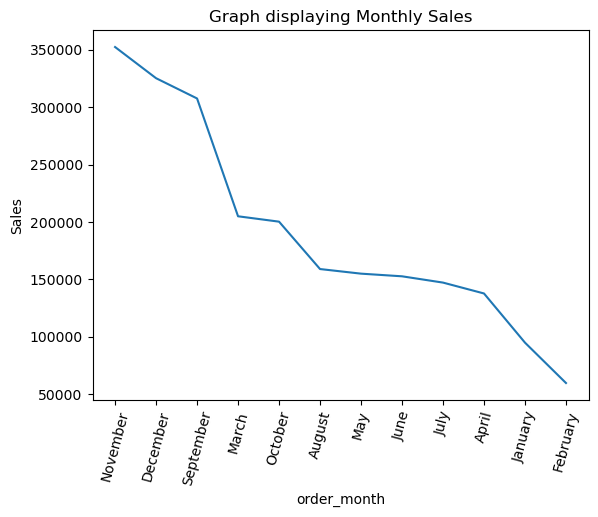

In [44]:
plt.title("Graph displaying Monthly Sales")
sns.lineplot(monthly_sales,x = "order_month",y="Sales")
plt.xticks(rotation = 75)
plt.show

In [45]:
# Sales on the basis of Category
category_sales = data.groupby('Category')["Sales"].sum()
category_sales

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

([<matplotlib.patches.Wedge at 0x21e46b64740>,
 [Text(0.5806251240511282, 0.9342775098013503, 'Furniture'),
  Text(-1.0908936275896106, 0.14124833904998657, 'Office Supplies'),
  Text(0.4558499046992793, -1.0010998273826932, 'Technology')],
 [Text(0.31670461311879716, 0.5096059144371001, '32.3%'),
  Text(-0.5950328877761512, 0.07704454857271993, '31.3%'),
  Text(0.24864540256324322, -0.5460544512996508, '36.4%')])

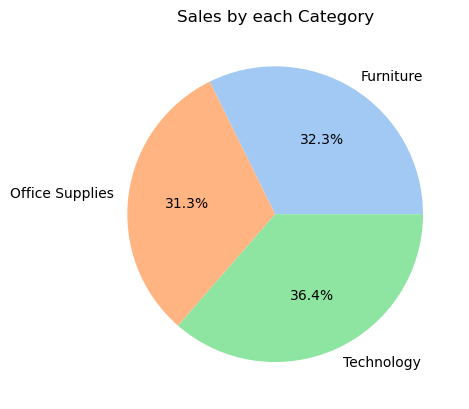

In [46]:
plt.title("Sales by each Category")
colors = sns.color_palette('pastel')[0:len(category_sales)]
plt.pie(category_sales,labels=category_sales.index, autopct='%1.1f%%',colors=colors)

In [47]:
#sales per Sub-Category
Sub_category_sales = data.groupby('Sub-Category')["Sales"].sum().reset_index()
Sub_category_sales

,Sub-Category,Sales
0,Accessories,167380.3180
1,Appliances,107532.1610
2,Art,27118.7920
3,Binders,203412.7330
4,Bookcases,114879.9963
5,Chairs,328449.1030
6,Copiers,149528.0300
7,Envelopes,16476.4020
8,Fasteners,3024.2800
9,Furnishings,91705.1640


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Accessories'),
  Text(1, 0, 'Appliances'),
  Text(2, 0, 'Art'),
  Text(3, 0, 'Binders'),
  Text(4, 0, 'Bookcases'),
  Text(5, 0, 'Chairs'),
  Text(6, 0, 'Copiers'),
  Text(7, 0, 'Envelopes'),
  Text(8, 0, 'Fasteners'),
  Text(9, 0, 'Furnishings'),
  Text(10, 0, 'Labels'),
  Text(11, 0, 'Machines'),
  Text(12, 0, 'Paper'),
  Text(13, 0, 'Phones'),
  Text(14, 0, 'Storage'),
  Text(15, 0, 'Supplies'),
  Text(16, 0, 'Tables')])

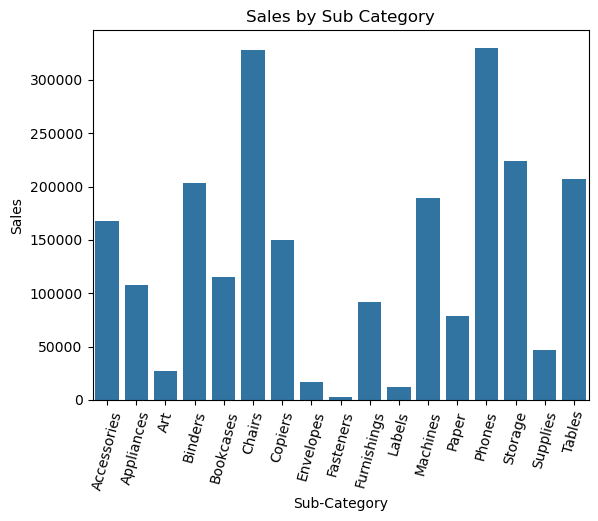

In [48]:
plt.title("Sales by Sub Category")
sns.barplot(Sub_category_sales,x = 'Sub-Category',y='Sales')
plt.xticks(rotation = 75)

In [ ]:
#Profit Analysis

In [50]:
# Profit's earned each month.
monthly_profit = data.groupby("order_month")["Profit"].sum().reset_index()
monthly_profit

,order_month,Profit
0,April,11587.4363
1,August,21776.9384
2,December,43369.1919
3,February,10294.6107
4,January,9134.4461
5,July,13832.6648
6,June,21285.7954
7,March,28594.6872
8,May,22411.3078
9,November,35468.4265


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'April'),
  Text(1, 0, 'August'),
  Text(2, 0, 'December'),
  Text(3, 0, 'February'),
  Text(4, 0, 'January'),
  Text(5, 0, 'July'),
  Text(6, 0, 'June'),
  Text(7, 0, 'March'),
  Text(8, 0, 'May'),
  Text(9, 0, 'November'),
  Text(10, 0, 'October'),
  Text(11, 0, 'September')])

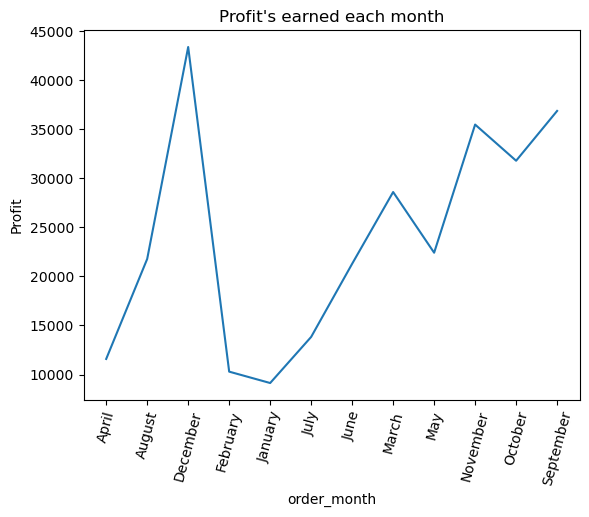

In [51]:
plt.title("Profit's earned each month")
sns.lineplot(monthly_profit,x="order_month",y = "Profit")
plt.xticks(rotation = 75)

In [52]:
# profit's earned per annum.
annual_profit = data.groupby("order_year")["Profit"].sum().reset_index()

<Axes: title={'center': 'Annual Profits'}, xlabel='order_year', ylabel='Profit'>

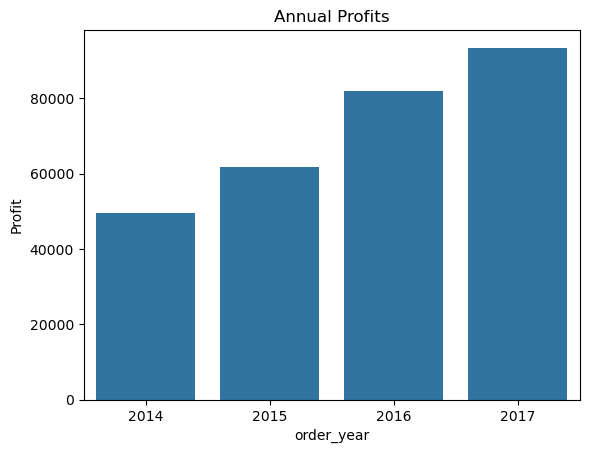

In [53]:
plt.title("Annual Profits")
sns.barplot(annual_profit,x = "order_year",y = "Profit")

In [54]:
#Profit's earned by each category.
category_profits = data.groupby("Category")["Profit"].sum()

([<matplotlib.patches.Wedge at 0x21e47087a70>,
 [Text(1.0775459327214676, 0.2211216020098955, 'Furniture'),
  Text(-0.19438549183984183, 1.0826884503688874, 'Office Supplies'),
  Text(-0.027224072906978994, -1.0996630619668717, 'Technology')],
 [Text(0.5877523269389823, 0.12061178291448844, '6.4%'),
  Text(-0.10602845009445917, 0.5905573365648477, '42.8%'),
  Text(-0.014849494312897631, -0.5998162156182936, '50.8%')])

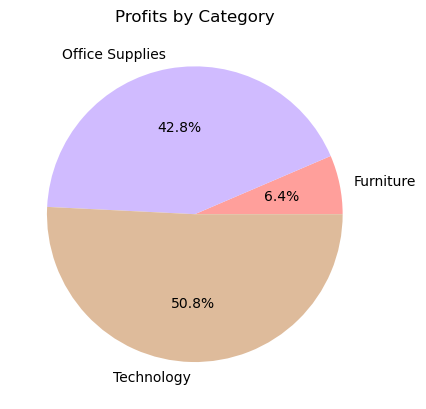

In [55]:
plt.title("Profits by Category")
colors = sns.color_palette('pastel')[3:7]
plt.pie(category_profits,labels=category_profits.index,autopct='%1.1f%%',colors=colors)

In [57]:
# Profit's earned by each sub category
sub_profit = data.groupby("Sub-Category")["Profit"].sum().reset_index()
sub_profit

,Sub-Category,Profit
0,Accessories,41936.6357
1,Appliances,18138.0054
2,Art,6527.7870
3,Binders,30221.7633
4,Bookcases,-3472.5560
5,Chairs,26590.1663
6,Copiers,55617.8249
7,Envelopes,6964.1767
8,Fasteners,949.5182
9,Furnishings,13059.1436


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Accessories'),
  Text(1, 0, 'Appliances'),
  Text(2, 0, 'Art'),
  Text(3, 0, 'Binders'),
  Text(4, 0, 'Bookcases'),
  Text(5, 0, 'Chairs'),
  Text(6, 0, 'Copiers'),
  Text(7, 0, 'Envelopes'),
  Text(8, 0, 'Fasteners'),
  Text(9, 0, 'Furnishings'),
  Text(10, 0, 'Labels'),
  Text(11, 0, 'Machines'),
  Text(12, 0, 'Paper'),
  Text(13, 0, 'Phones'),
  Text(14, 0, 'Storage'),
  Text(15, 0, 'Supplies'),
  Text(16, 0, 'Tables')])

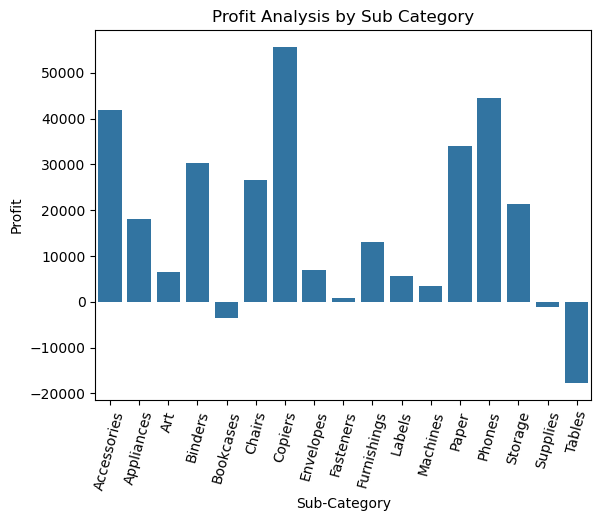

In [58]:
plt.title("Profit Analysis by Sub Category")
sns.barplot(sub_profit,x = "Sub-Category",y = "Profit")
plt.xticks(rotation = 75)

In [59]:
segment = data.groupby("Segment")[["Sales","Profit"]].sum()
segment

,Sales,Profit
Segment,,
Consumer,1.161401e+06,134119.2092
Corporate,7.061464e+05,91979.1340
Home Office,4.296531e+05,60298.6785


Text(0, 0.5, 'Sales,Profit')

<Figure size 1200x600 with 0 Axes>

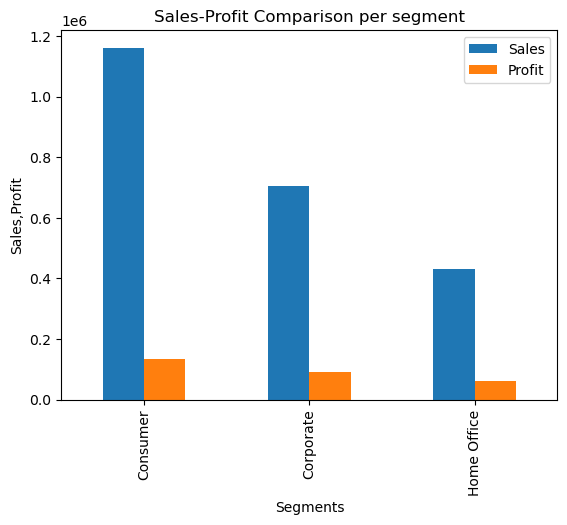

In [60]:
plt.figure(figsize=(12, 6))
segment.plot(kind='bar')
plt.title("Sales-Profit Comparison per segment")
plt.xlabel("Segments")
plt.ylabel("Sales,Profit")

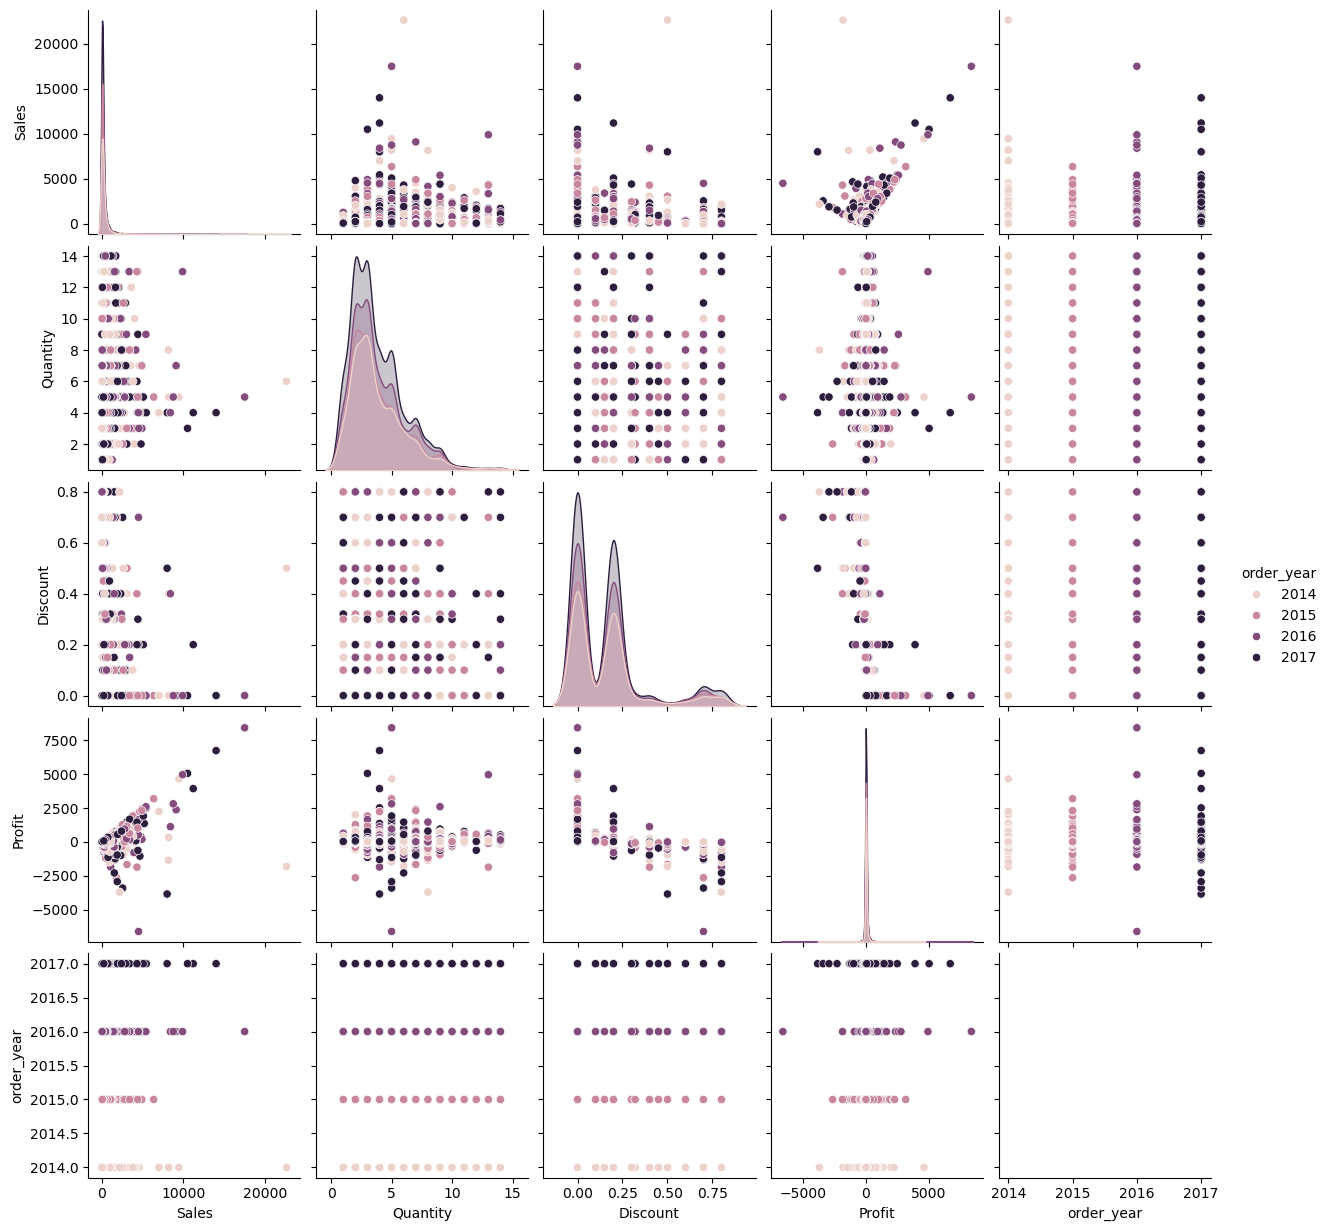

In [61]:
# Plotting a PairPlot
sns.pairplot(data,vars=['Sales', 'Quantity', 'Discount', 'Profit','order_year'], hue='order_year')

In [62]:
# Shape of the DataFrame
data.shape

(9994, 25)

In [63]:
# Clubbing all Numerical Columns
Num1 = data[['Row ID',  'Postal Code','Sales', 'Quantity', 'Discount', 'Profit', 'Ship_year']]

In [64]:
# Clubbing all Categorical Columns
Cat1 = data[['Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
        'Region', 'Product ID', 'Category', 'Sub-Category', 'order_month',  'Ship_month',
       'Product Name', 
       'order_month']]

In [65]:
columns = data[['Row ID', 'Sales', 'Quantity', 'Discount', 'Profit']]

In [66]:
columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Row ID    9994 non-null   int64  
 1   Sales     9994 non-null   float64
 2   Quantity  9994 non-null   int64  
 3   Discount  9994 non-null   float64
 4   Profit    9994 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 390.5 KB


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [68]:
# Create a correlation matrix
corr_matrix = Num1.corr()

<Axes: >

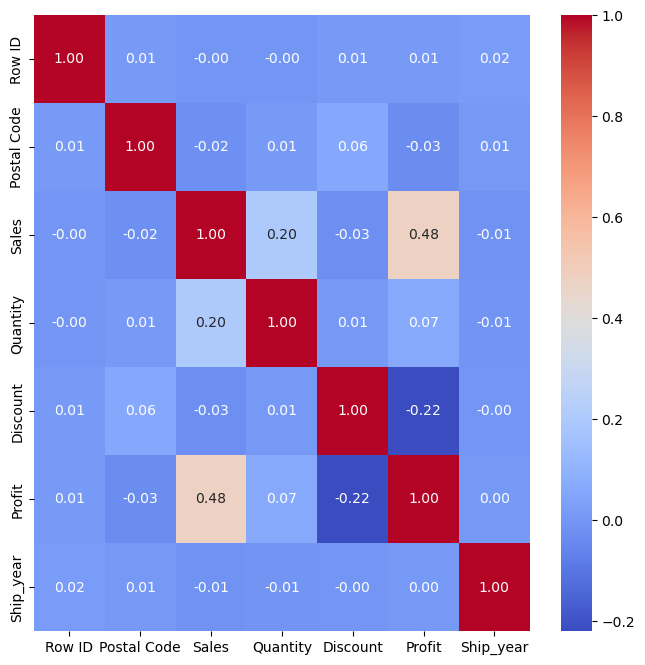

In [69]:
# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

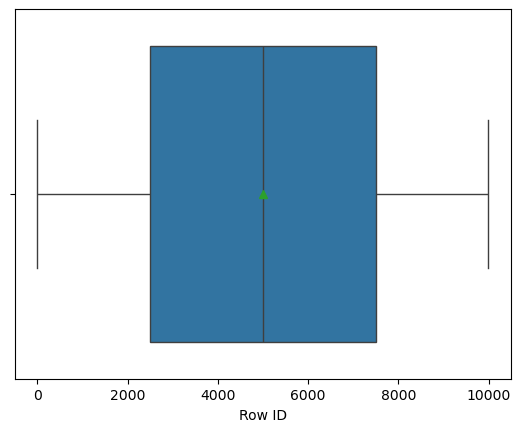

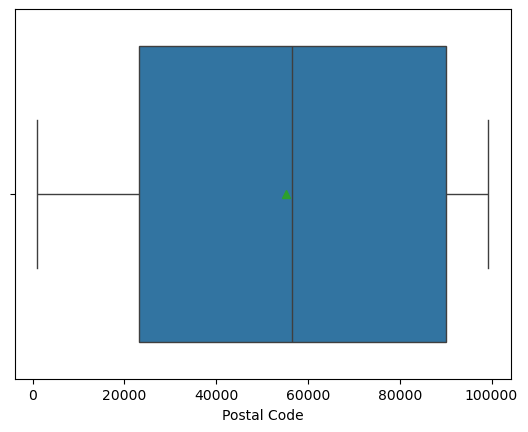

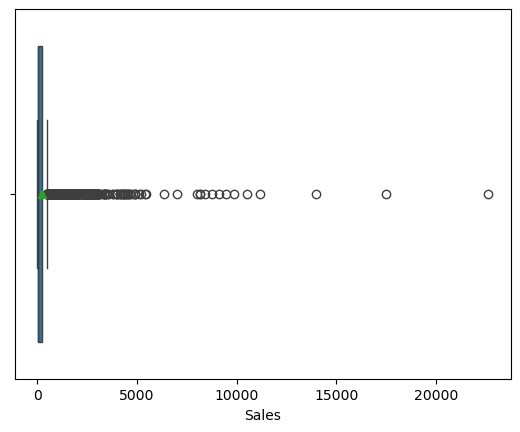

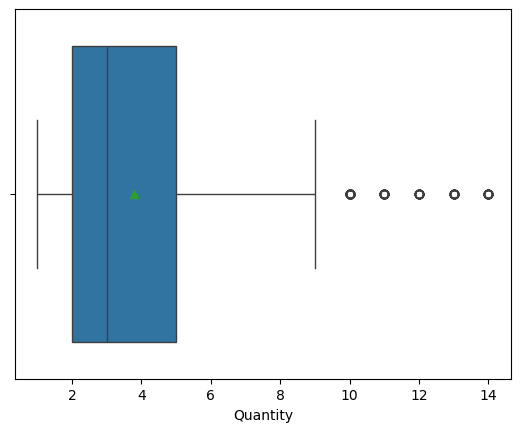

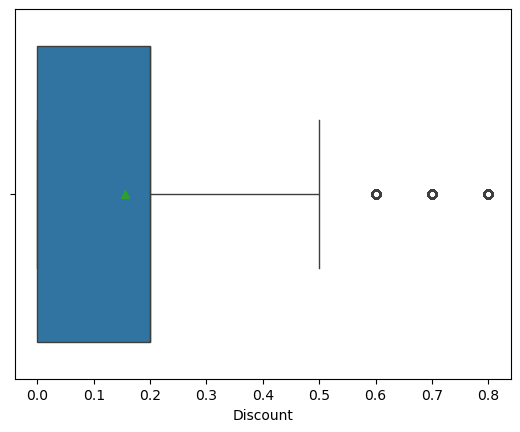

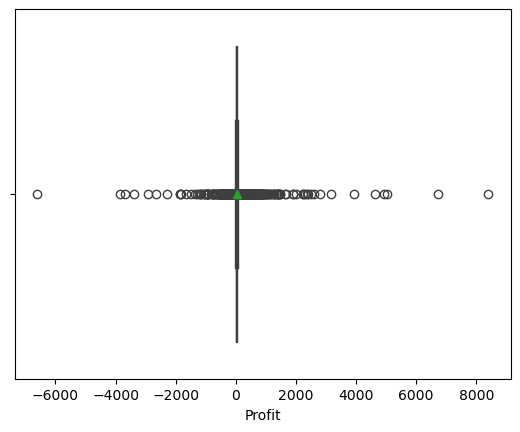

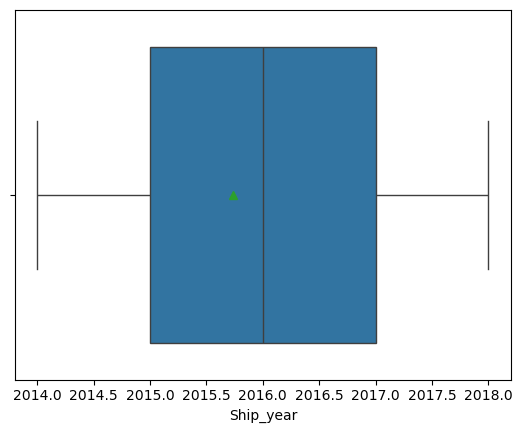

In [70]:
# Using Box-Plot to find outliers if any in the Numerical Columns
for col in Num1.columns:
    sns.boxplot(x = Num1[col],showmeans = True)
    plt.show()

In [71]:
# Using exponential method to reduce outliers
exp = data[[ 'Sales', 'Quantity', 'Discount', 'Profit']]

In [72]:
np.exp(exp["Sales"])

0       5.858447e+113
1                 inf
2        2.235555e+06
3                 inf
4        5.179633e+09
            ...      
9989     9.227139e+10
9990     8.664042e+39
9991    1.986689e+112
9992     7.163358e+12
9993    4.009094e+105
Name: Sales, Length: 9994, dtype: float64

In [74]:
# Using for-loop for reducing treatment
for i in exp.columns:
    exp[i] = np.exp(exp[i])
exp

,Sales,Quantity,Discount,Profit
0,inf,1.618178e+03,2.718282,inf
1,inf,5.284913e+08,2.718282,inf
2,inf,1.618178e+03,2.718282,inf
3,inf,2.851124e+64,4.798542,1.000000e+00
4,inf,1.618178e+03,3.391942,2.389320e+05
...,...,...,...,...
9989,inf,5.284913e+08,3.391942,1.900781e+26
9990,inf,1.618178e+03,2.718282,inf
9991,inf,1.618178e+03,3.391942,inf
9992,inf,5.148436e+23,2.718282,inf


In [76]:
# Replacing the values of Num1 dataframe with exponential values.
Num1[[ 'Sales', 'Quantity', 'Discount', 'Profit']] = exp[[ 'Sales', 'Quantity', 'Discount', 'Profit']]
Num1

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Ship_year
0,1,42420,inf,1.618178e+03,2.718282,inf,2016
1,2,42420,inf,5.284913e+08,2.718282,inf,2016
2,3,90036,inf,1.618178e+03,2.718282,inf,2016
3,4,33311,inf,2.851124e+64,4.798542,1.000000e+00,2015
4,5,33311,inf,1.618178e+03,3.391942,2.389320e+05,2015
...,...,...,...,...,...,...,...
9989,9990,33180,inf,5.284913e+08,3.391942,1.900781e+26,2014
9990,9991,92627,inf,1.618178e+03,2.718282,inf,2017
9991,9992,92627,inf,1.618178e+03,3.391942,inf,2017
9992,9993,92627,inf,5.148436e+23,2.718282,inf,2017


In [ ]:
#Creating New Dataframe Mod1 to build a linear_model

In [77]:
Mod1 = Num1

In [78]:
Cat1.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'order_month', 'Ship_month',
       'Product Name', 'order_month'],
      dtype='object')

In [79]:
Mod1["Region"] = Cat1["Region"]

In [81]:
mod1 = data[[ 'Ship Mode','Segment', 'City', 'State', 'Region', 'Category', 'Sub-Category', ]]

In [82]:
Mod1[['Sales', 'Quantity', 'Discount', 'Profit',"Ship_year"]] = Num1[['Sales', 'Quantity', 'Discount', 'Profit',"Ship_year"]]

In [83]:
Mod1[['Ship Mode', 
        'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category']] = Cat1[['Ship Mode', 
        'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category']] 

In [84]:
Mod1.sample(n = 5)

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Ship_year,Region,Ship Mode,Segment,Country,City,State,Category,Sub-Category
9606,9607,43130,inf,5.284913e+08,3.391942,1.0,2017,East,Standard Class,Corporate,United States,Lancaster,Ohio,Office Supplies,Storage
9084,9085,23434,inf,2.851124e+64,2.718282,inf,2015,South,First Class,Corporate,United States,Suffolk,Virginia,Office Supplies,Paper
970,971,19134,inf,1.610271e+175,3.391942,inf,2014,East,Second Class,Consumer,United States,Philadelphia,Pennsylvania,Furniture,Furnishings
8702,8703,37211,inf,2.851124e+64,3.391942,inf,2017,South,Standard Class,Corporate,United States,Nashville,Tennessee,Office Supplies,Paper
6486,6487,28540,inf,5.148436e+23,3.391942,inf,2015,South,Standard Class,Consumer,United States,Jacksonville,North Carolina,Office Supplies,Appliances


In [85]:
# All the Features to be used in the model.
Mod1.columns

Index(['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Ship_year', 'Region', 'Ship Mode', 'Segment', 'Country', 'City',
       'State', 'Category', 'Sub-Category'],
      dtype='object')

In [86]:
#Using Label Encoder to encode Columns
labelencoder = LabelEncoder()

In [87]:
for i in Mod1.columns:
    Mod1[i] = labelencoder.fit_transform(Mod1[i])

In [88]:
# Preparing X & y for model execution
# y contains Target Vatiable
y = Mod1["Profit"]

In [89]:
# X contains Independent Variables
X = Mod1.drop(columns='Profit')
X

,Row ID,Postal Code,Sales,Quantity,Discount,Ship_year,Region,Ship Mode,Segment,Country,City,State,Category,Sub-Category
0,0,217,409,1,0,2,2,2,0,0,194,15,0,4
1,1,217,409,2,0,2,2,2,0,0,194,15,0,5
2,2,517,409,1,0,2,3,2,1,0,266,3,1,10
3,3,170,409,4,7,1,2,3,0,0,153,8,0,16
4,4,170,409,1,3,1,2,3,0,0,153,8,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9989,169,409,2,3,0,2,2,0,0,295,8,0,9
9990,9990,555,409,1,0,3,3,3,0,0,104,3,0,9
9991,9991,555,409,1,3,3,3,3,0,0,104,3,2,13
9992,9992,555,409,3,0,3,3,3,0,0,104,3,1,12


In [90]:
# Dropping Country Column since the Data is of only united States
X.drop(columns='Country',inplace=True)

In [91]:
# Using Train-Test Split to split the data in training & testing halves.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=2)

In [ ]:
#Implementing Different Machine Learning Algorithms to Predict the Profit in the most Accurate and Precise manner

In [93]:
#1.Linear Regression
#importing Linear Regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [94]:
# Score of the Linear Model built
regression.score(X_test,y_test)

0.5077756957509743

In [95]:
import sklearn.metrics as metrics
ypred = regression.predict(X_test)
r_squared = metrics.r2_score(y_test, ypred)
r_squared

0.5077756957509743

In [98]:
#2.Lasso Regression
# importing Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
lasso_reg.fit(X_train,y_train)

Lasso()

In [99]:
# Lasso Model Accuracy
lasso_reg.score(X_test,y_test)

0.5078035452307823

In [101]:
#3.Ridge Regression
# importing Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
ridge_reg.fit(X_train,y_train)

Ridge()

In [102]:
# Accuracy of Ridge Regression Model
ridge_reg.score(X_test,y_test)

0.5077763624455894

In [103]:
#4.Random Forest
# importing Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [104]:
ypred = rf.score(X_test,y_test)

In [105]:
# Accuracy of Random Forest Regressor
ypred

0.6738812995693162

In [107]:
#5.K Nearest Neighbour
# importing KNN regressor
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [108]:
# Accuracy of KNN Model
knn_reg.score(X_test,y_test)

0.04906970675753419